In [2]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 
plt.style.use("ggplot")

### Data Manipulation

In [3]:
def get_data():
    np.random.seed(1)
    Nclass = 500
    D = 2  # input dimension 
    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2,  2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])
    
    # target label 
    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

    return X,Y 

In [12]:
def vectorize_target(Y):
    K = np.max(Y)+1
    N = len(Y) 
    T = np.zeros((N,K))
    for i in range(N):
        T[i, Y[i]] = 1
    return T

### Forward Propagation 

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [34]:
def forward(X, W1, b1, W2, b2):
    Z = sigmoid( X.dot(W1) + b1)
    A = Z.dot(W2) + b2 
    Y = softmax(A) 
    return Y,Z 

### Back Propergation 

In [59]:
def derivative_w2(Z,T,Y):
    N, K = T.shape
    M = Z.shape[1]   # Z: {NxM}
    
    # slow 
    #ret1 = np.zeros((M,K))
    #for n in range(N): 
    #    for m in range(M): 
    #        for k in range(K):
    #            ret1[m,k] += (T[n,k]-Y[n,k]) * Z[n,m]
    #return ret1
    
    ret4 = Z.T.dot(T - Y)
    return ret4

In [51]:
def derivative_b2(T,Y):
    return (T - Y).sum(axis=0) 

In [62]:
def derivative_w1(X,Z,T,Y,W2):
    N, D = X.shape 
    M, K = W2.shape
    
    # slow 
    #ret1 = np.zeros((D,M))
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])*X[n,d]
    #return ret1 
     
    dz = (T-Y).dot(W2.T) * Z * (1-Z) 
    ret2 = X.T.dot(dz)
    return ret2
    

In [53]:
def derivative_b1(T,Y,W2,Z):
    return ((T-Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

### Criteria

In [11]:
# Target Label (Y) and Predicted Label (P) =>  score as average accuracy 
def classification_rate(Y, P):
    return (Y==P).mean() 

In [77]:
# Cross Entropy between target vector (T) and predicted probability vector (Y) 
# Note that T and Y have D columns (=3), one to each possible class 
def cost(T, Y):
    tot = T * np.log(Y) 
    return -tot.sum() 

## Main Test Function 

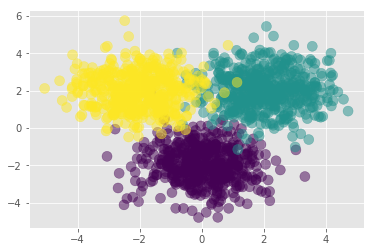

In [14]:
X,Y = get_data()
# scatter plot 
plt.scatter( X[:,0], X[:,1], c=Y, s=100, alpha=0.5);

In [16]:
T = vectorize_target(Y)
T.shape

(1500, 3)

In [19]:
# One hidden layer 
N,D = X.shape 
M = 3             # 3 units in hidden layer
K = T.shape[1]    # 3 target classes 

In [86]:
W1 = np.random.randn(D,M) 
b1 = np.random.randn(M)
W2 = np.random.randn(M,K) 
b2 = np.random.randn(K) 

epochs = 1000
interval = 50 

learning_rate = 1e-3
costs = []
rates = []
for epoch in range(epochs):
    output, hidden = forward(X,W1,b1,W2,b2)
    if epoch % interval == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1) 
        r = classification_rate(Y, P) 
        print("cost: ", c, "classification_rate: ", r)
        costs.append(c)
        rates.append(r)
        
    # gradient ASCENT (not DESCDENT)
    W2 += learning_rate * derivative_w2(hidden, T, output) 
    b2 += learning_rate * derivative_b2(T, output) 
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2) 
    b1 += learning_rate * derivative_b1(T, output, W2, hidden) 


cost:  2216.6500485630772 classification_rate:  0.13
cost:  201.8392701336437 classification_rate:  0.9686666666666667
cost:  146.0800895634784 classification_rate:  0.968
cost:  132.26765154547894 classification_rate:  0.9693333333333334
cost:  126.13436381368592 classification_rate:  0.97
cost:  122.64769097694743 classification_rate:  0.9706666666666667
cost:  120.3893639445457 classification_rate:  0.9686666666666667
cost:  118.81099428232807 classification_rate:  0.9693333333333334
cost:  117.65276254769805 classification_rate:  0.9686666666666667
cost:  116.77240144356287 classification_rate:  0.9693333333333334
cost:  116.0840442354688 classification_rate:  0.97
cost:  115.53246336618083 classification_rate:  0.9693333333333334
cost:  115.08055114778136 classification_rate:  0.9693333333333334
cost:  114.70260962260761 classification_rate:  0.9693333333333334
cost:  114.38048258826223 classification_rate:  0.97
cost:  114.10116974468183 classification_rate:  0.97
cost:  113.8552

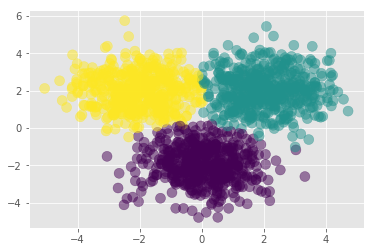

In [87]:
plt.scatter( X[:,0], X[:,1], c=P, s=100, alpha=0.5);

### Cross Entropy to be Minimized  
And as a result, classification rate (accuracy) from training must be maximized.  

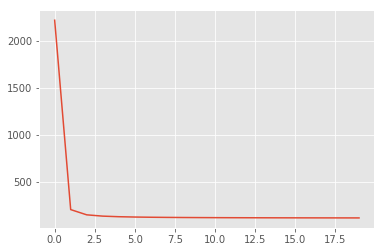

In [88]:
plt.plot(costs)

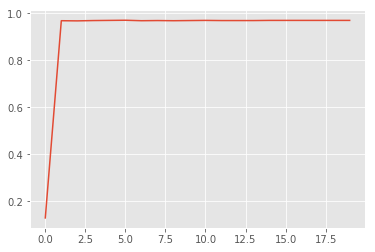

In [89]:
plt.plot(rates)